### Install Networkx

In [ ]:
pip install networkx

### Initial Graph

( 1 , 2 )
( 1 , 8 )
( 2 , 3 )
( 3 , 4 )
( 4 , 2 )
( 4 , 5 )
( 5 , 6 )
( 6 , 7 )
( 7 , 5 )
( 8 , 9 )
( 9 , 4 )
( 9 , 10 )
( 10 , 11 )
( 10 , 8 )
( 11 , 8 )


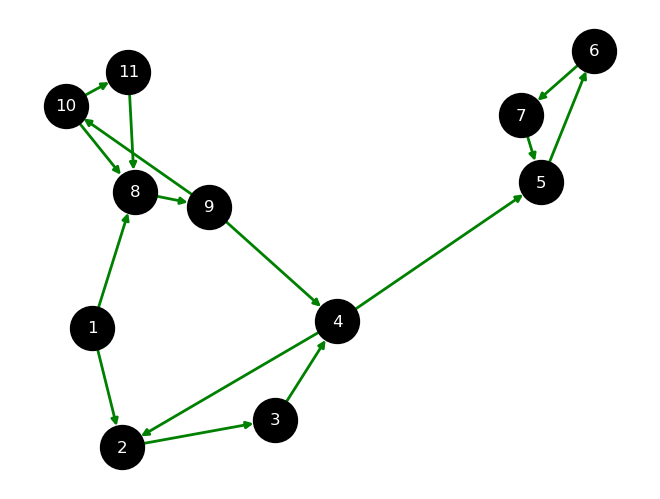

In [4]:
from graph import Graph, Tarjan
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
import matplotlib.pyplot as plt

g = Graph()
g.addEdge(1,2)
g.addEdge(2,3)
g.addEdge(3,4)
g.addEdge(4,2)
g.addEdge(4,5)
g.addEdge(5,6)
g.addEdge(6,7)
g.addEdge(7,5)
g.addEdge(1,8)
g.addEdge(8,9)
g.addEdge(9,4)
g.addEdge(9,10)
g.addEdge(10,11)
g.addEdge(10,8)
g.addEdge(11,8)
for v in g:
    for w in v.getConnections():
        print("( %s , %s )" % (v.getId(), w.getId()))


# Visual graph
G1 = nx.DiGraph()
for v in g:
    for w in v.getConnections():
        G1.add_edge(v.getId(), w.getId())

pos = nx.spring_layout(G1)
nx.draw(G1, pos, node_size=1000, node_color='black', font_color='white', edge_color ='green', width = 2, with_labels= True)

In [2]:
tarj = Tarjan(g)
tarj.setup()
tarj.run()
subGraphs = tarj.get_final_sub_graphs()

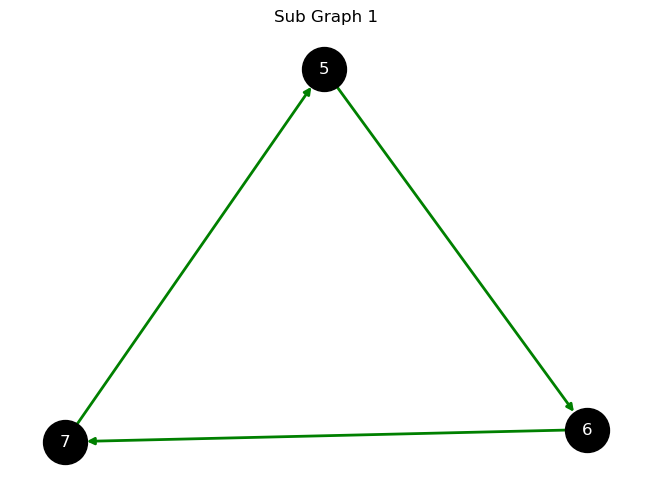

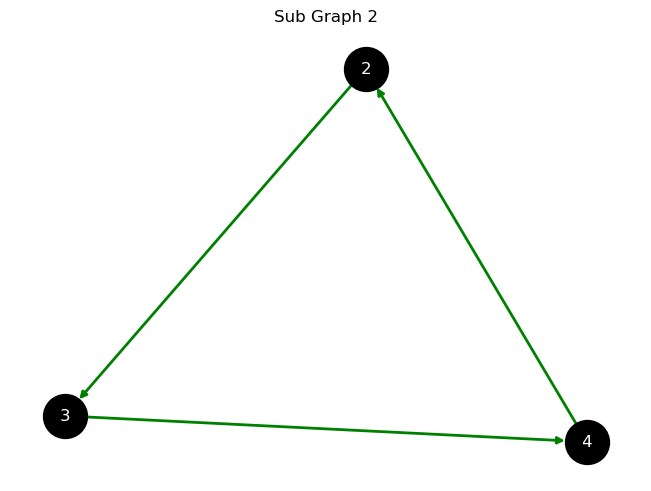

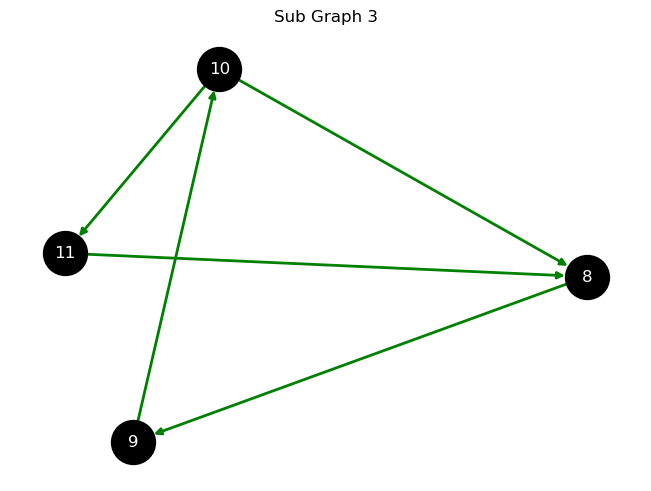

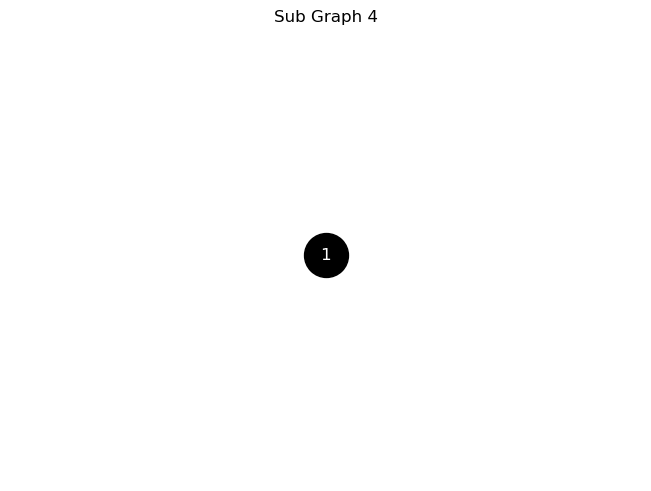

In [3]:
# Visual sub graphs
index = 0
for subGraph in subGraphs:
    index += 1
    fig, ax = plt.subplots(1, 1, layout='constrained', sharey=True)
    ax.set_title('Sub Graph ' + str(index))
    G1 = nx.DiGraph()
    for v in subGraph:
        if len(subGraph.getVertices()) == 1:
            G1.add_node(v.getId())
        else:
            for w in v.getConnections():
                G1.add_edge(v.getId(), w.getId())

    pos = nx.spring_layout(G1)
    nx.draw(G1, pos, node_size=1000, node_color='black', font_color='white', edge_color ='green', width = 2, with_labels= True)